In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv("01-sea-temperature.csv", header=0)
raw.head()

,id,salinity,temperature
0,0,33.440,10.50
1,1,33.440,10.46
2,2,33.437,10.46
3,3,33.420,10.45
4,4,33.421,10.45


Given a dataset X,Y. We can predict Y by:
    $$f(x,\theta)_n = \theta_0 + \theta_0x_n$$
For a multi-dimentional input:
    $$f(x^i,\theta)_n = \theta_0 + \theta_0x_n^1+\theta_1x_n^2 +....$$
first we set arbitray values for $\theta_i$, then we define a Cost function, in this example mean squere error:
$$C(\theta) = \frac{1}{2m} \sum _{n=1}^m (f_\theta(x_n)-y_n)^2$$

Then we apply gradient decsent by ubdating $\theta_i$ in the following way:

$$\theta_i' = \theta_i - \alpha \frac{\delta}{\delta \theta_i} C(\theta) $$

Where $\alpha$ is the learning rate.



    
    

In [73]:
'''Gradient descent, paramenters X: 2d numpy array shape(x)=[n,i],Y: 2d numpy array shape(x)=[n,1], 
learningrate'''
class gradient_descent:
    def __init__(self, X: np.array , Y: np.array, learnig_rate):
        self.m = len(X)
        self.X = X
        self.Xmat = np.concatenate([np.ones((len(X), 1)), self.X], axis=1)
        self.Y = Y
        self.theta = np.random.rand(1,np.shape(X)[1]+1)
        self.theta[0,0]= 169
        self.theta[0,1]=-4.7
        self.learnig_rate = learnig_rate
        self.fX = self.Xmat@self.theta.T
        self.delta = self.fX - self.Y
        self.mean_sq_error = (1/(self.m*2))*np.sum(np.power(self.delta,2))

    def train_epoch(self):
        self.grad = (1/self.m)*self.Xmat.T@ self.delta
        print(self.grad)

    def update(self):
        self.theta = self.theta - (self.learnig_rate/self.m)*self.grad
        self.fX = self.Xmat@self.theta.T
        self.delta = self.fX - self.Y
        self.mean_sq_error = (1/(self.m*2))*np.sum(np.power(self.delta,2))


    def predict(self, X_test):
        return self.Xmat@self.theta   

        

[[ 1.    33.44 ]
 [ 1.    33.44 ]
 [ 1.    33.437]
 [ 1.    33.42 ]
 [ 1.    33.421]
 [ 1.    33.431]
 [ 1.    33.44 ]
 [ 1.    33.424]
 [ 1.    33.42 ]
 [ 1.    33.494]
 [ 1.    33.51 ]
 [ 1.    33.58 ]
 [ 1.    33.64 ]
 [ 1.    33.689]
 [ 1.    33.847]
 [ 1.    33.86 ]
 [ 1.    33.876]
 [ 1.    33.926]
 [ 1.    33.98 ]
 [ 1.    33.99 ]
 [ 1.    34.04 ]
 [ 1.    34.056]
 [ 1.    34.113]
 [ 1.    34.16 ]
 [ 1.    34.161]
 [ 1.    34.21 ]
 [ 1.    34.261]
 [ 1.    34.31 ]
 [ 1.    32.95 ]
 [ 1.    32.94 ]
 [ 1.    32.939]
 [ 1.    32.95 ]
 [ 1.    33.013]
 [ 1.    33.24 ]
 [ 1.    33.272]
 [ 1.    33.46 ]
 [ 1.    33.488]
 [ 1.    33.6  ]
 [ 1.    33.631]
 [ 1.    33.745]
 [ 1.    33.8  ]
 [ 1.    33.833]
 [ 1.    33.93 ]
 [ 1.    33.939]
 [ 1.    33.943]
 [ 1.    33.95 ]
 [ 1.    33.957]
 [ 1.    34.   ]
 [ 1.    34.016]
 [ 1.    34.101]
 [ 1.    34.16 ]
 [ 1.    34.188]
 [ 1.    34.259]
 [ 1.    34.319]
 [ 1.    34.34 ]
 [ 1.    34.354]
 [ 1.    34.378]
 [ 1.    34.403]
 [ 1.    34.42

array([[169. ,  -4.7]])

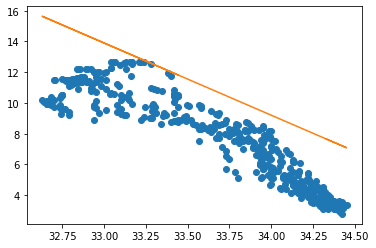

In [74]:
salinity = raw.salinity.to_numpy().reshape((-1,1))
temperature = raw.temperature.to_numpy().reshape((-1,1))

model = gradient_descent(salinity, temperature, 0.2)

ypredict = model.fX.reshape(-1)
plt.plot(salinity, temperature, 'o')
plt.plot(salinity, ypredict)
model.theta

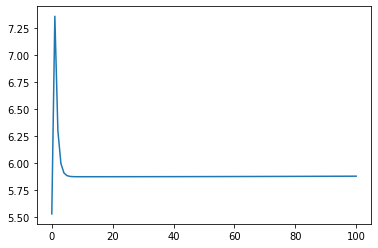

In [71]:
error = []
error.append(model.mean_sq_error)
for i in range(100):
    model.train_epoch()
    model.update()
    error.append(model.mean_sq_error)
plt.plot(error)



ValueError: x and y must have same first dimension, but have shapes (487, 1) and (974,)

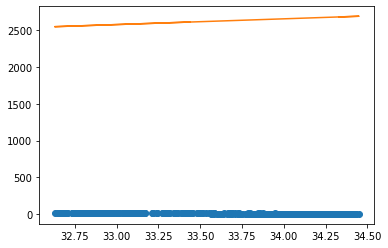

In [36]:
np.random.rand(3,1)


array([[0.84016627],
       [0.13753491],
       [0.17777408]])